In [9]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt
import time
import itertools

# A Sample Implementation fo grover's Algorithm

[69, 45, 48, 22, 11, 77, 88, 71, 7, 47]
[1. 0. 1. 0. 0. 0. 0. 1. 1. 1.]


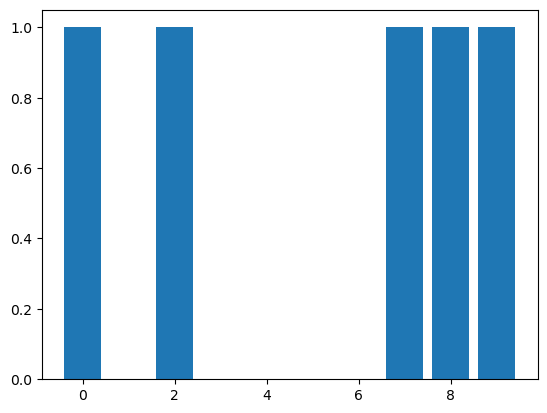

In [10]:
def conventional_search(count1, values_arr):
    total = np.sum(values_arr)
    sz = len(values_arr)
    
    for ele in itertools.combinations(values_arr,sz//2):
        count1+=1
        if sum(ele)==total//2:
            #print("Took "+str(count1)+" Iterations")
            return ele, count1
    return np.zeros(sz//2),-1
        
def convert_res(count1, size):
    
    np_values_arr = np.random.randint(1,101,size)
    values_arr = np_values_arr.tolist()
    print(values_arr)

    results_arr = np.zeros(len(values_arr))
    if conventional_search(count1, values_arr)[1]>-1:
        for ele in conventional_search(count1, values_arr)[0]:
            results_arr[values_arr.index(ele)]=1
        return results_arr

count1=0
size = 10
values = convert_res(count1,size)
plt.bar(range(len(values)), values)
print(values)

In [4]:
import matplotlib.pyplot as plt
import pennylane as qml
import numpy as np


Expectation value: 0.5122933441848302


# Intializing states

In [11]:
NUM_QUBITS = 2
dev = qml.device("default.qubit", wires=NUM_QUBITS)
wires = list(range(NUM_QUBITS))


def equal_superposition(wires):
    for wire in wires:
        qml.Hadamard(wires=wire)


@qml.qnode(dev)
def circuit():
    qml.Snapshot("Initial state")
    equal_superposition(wires)
    qml.Snapshot("After applying the Hadamard gates")
    return qml.probs(wires=wires)  # Probability of finding a computational basis state on the wires


results = qml.snapshots(circuit)()

for k, result in results.items():
    print(f"{k}: {result}")

Initial state: [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
After applying the Hadamard gates: [0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]
execution_results: [0.25 0.25 0.25 0.25]


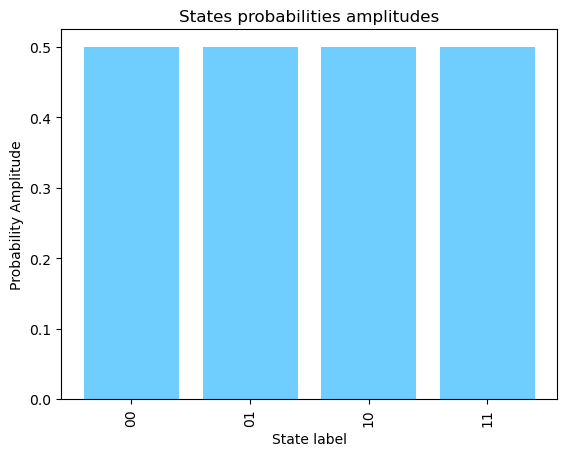

In [12]:
y = np.real(results["After applying the Hadamard gates"])
bit_strings = [f"{x:0{NUM_QUBITS}b}" for x in range(len(y))]

plt.bar(bit_strings, y, color = "#70CEFF")

plt.xticks(rotation="vertical")
plt.xlabel("State label")
plt.ylabel("Probability Amplitude")
plt.title("States probabilities amplitudes")
plt.show()

# Defining oracle and grover diffusion operator

Initial state |00>: [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
After flipping it: [-1.+0.j  0.+0.j  0.+0.j  0.+0.j]
execution_results: [-1.+0.j  0.+0.j  0.+0.j  0.+0.j]


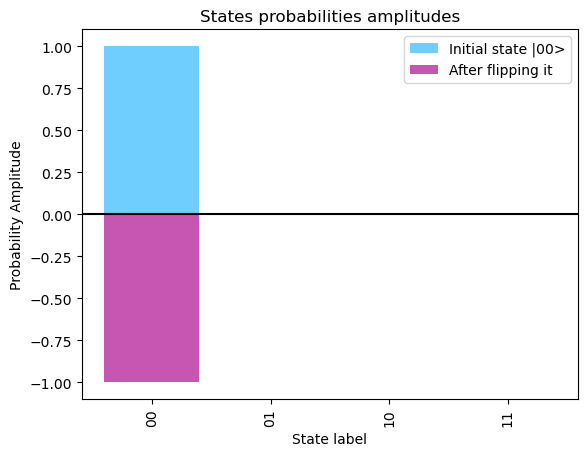

In [13]:
dev = qml.device("default.qubit", wires=NUM_QUBITS)

@qml.qnode(dev)
def circuit():
    qml.Snapshot("Initial state |00>")
    # Flipping the marked state
    qml.FlipSign([0, 0], wires=wires)
    qml.Snapshot("After flipping it")
    return qml.state()

results = qml.snapshots(circuit)()

for k, result in results.items():
    print(f"{k}: {result}")

y1 = np.real(results["Initial state |00>"])
y2 = np.real(results["After flipping it"])

bit_strings = [f"{x:0{NUM_QUBITS}b}" for x in range(len(y))]

plt.bar(bit_strings, y1, color = "#70CEFF")
plt.bar(bit_strings, y2, color = "#C756B2")

plt.xticks(rotation="vertical")
plt.xlabel("State label")
plt.ylabel("Probability Amplitude")
plt.title("States probabilities amplitudes")

plt.legend(["Initial state |00>", "After flipping it"])
plt.axhline(y=0.0, color="k", linestyle="-")
plt.show()